# University Life in Udine

Are you a student wishing to study in Udine? Here's everything you need to know.

### Some info about the notebook

In this notebook there will be content designed specifically for users, others for programmers.

This distinction is made explicit by the use of the following icons:
- User $\rightarrow$ 🧍‍♂️
- Programmer $\rightarrow$ 👨‍💻

---

## Setup

👨‍💻 We import the necessary libraries for the notebook to correctly work.

In [1]:
# Import Libraries
import geopandas as gpd
import pygeos
import pyrosm
import matplotlib.pyplot as plt
import geopy

# Import custom modules
import os
import sys
sys.path.insert(0, os.path.abspath('../')) # need to pass absolute path in nb

from functions.dataviz import plot_udine_map, extract_data_from_OSM

print("> Setup Completed")

> Setup Completed


## Map of the City

🧍‍♂️ Below you will find a simplified map of the city with all the main locations that might interest you.

👨‍💻 The steps to build the map follow

In [2]:
# import data on Italian municipalities
italy_municipalities_path = "../data/Com01012021_g/Com01012021_g_WGS84.shp"
italy_municipalities = gpd.read_file(italy_municipalities_path)

# save Udine and the municipalities in the province of Udine
udine_geodf = italy_municipalities.loc[italy_municipalities["COMUNE"] == "Udine"]
udine_mun_geodf = italy_municipalities.loc[italy_municipalities["COD_PROV"] == 30]

<AxesSubplot:>

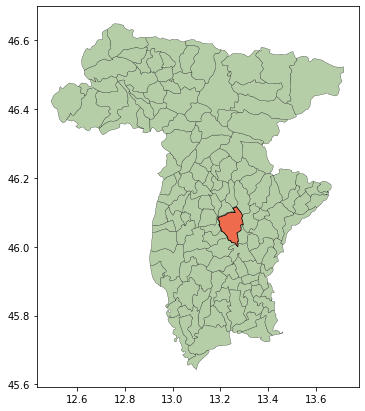

In [3]:
# Let's plot what we have

# create the base plot with the municipalities
base = udine_mun_geodf.to_crs(epsg=4326).plot(
    figsize=(10, 7),
    color="#b5cea8",
    edgecolor="k",
    linewidth = 0.25
    )

# plot hover the municipalities Udine and highlights it
udine_geodf.to_crs(epsg=4326).plot(
    facecolor='none', 
    ax=base,
    color="#EE6C4D",
    edgecolor="k",
    linewidth = 0.75
    )

In [4]:
# we now import the .pbf file of the city, obtained through Wikimedia Italy
udine_osm = pyrosm.OSM("../data/udine.osm.pbf")

### Plot the base map of Udine

We start by showing the simplest map obtainable.

In [5]:
# plot_udine_map(
#     udine_geodf = udine_geodf, 
#     udine_osm = udine_osm, 
#     list_of_places = [],
#     save = True,
#     save_path="../dataviz/udine_empty_map.jpg"
#     )

### Plot places of interest

Using the `plot_udine_map()` function, we can plot many interesting places for students on the map of Udine.

It follows the legend of the map.

![](../images/udine_plot_complete_legend.png)

> Obtaining Buildings from OSM
> Obtaining Streets from OSM
> Clipping Buildings and Streets
> Generating Base Map
> Adding Buildings
> Adding Streets
> Adding Universities
> Adding Supermarket
> Adding Hospitals
> Adding Eating Places
> Adding Bicycle Rental Locations
> Adding Car Rental Locations
> Adding Bus Stations
> Adding info about provided Address to the Map
 - Geocoding Address
 - Checking that the position found is within the boundaries of Udine
 - The location is within boundaries, adding info to the map
> Saving the image

> Elapsed Time: 15.62 seconds


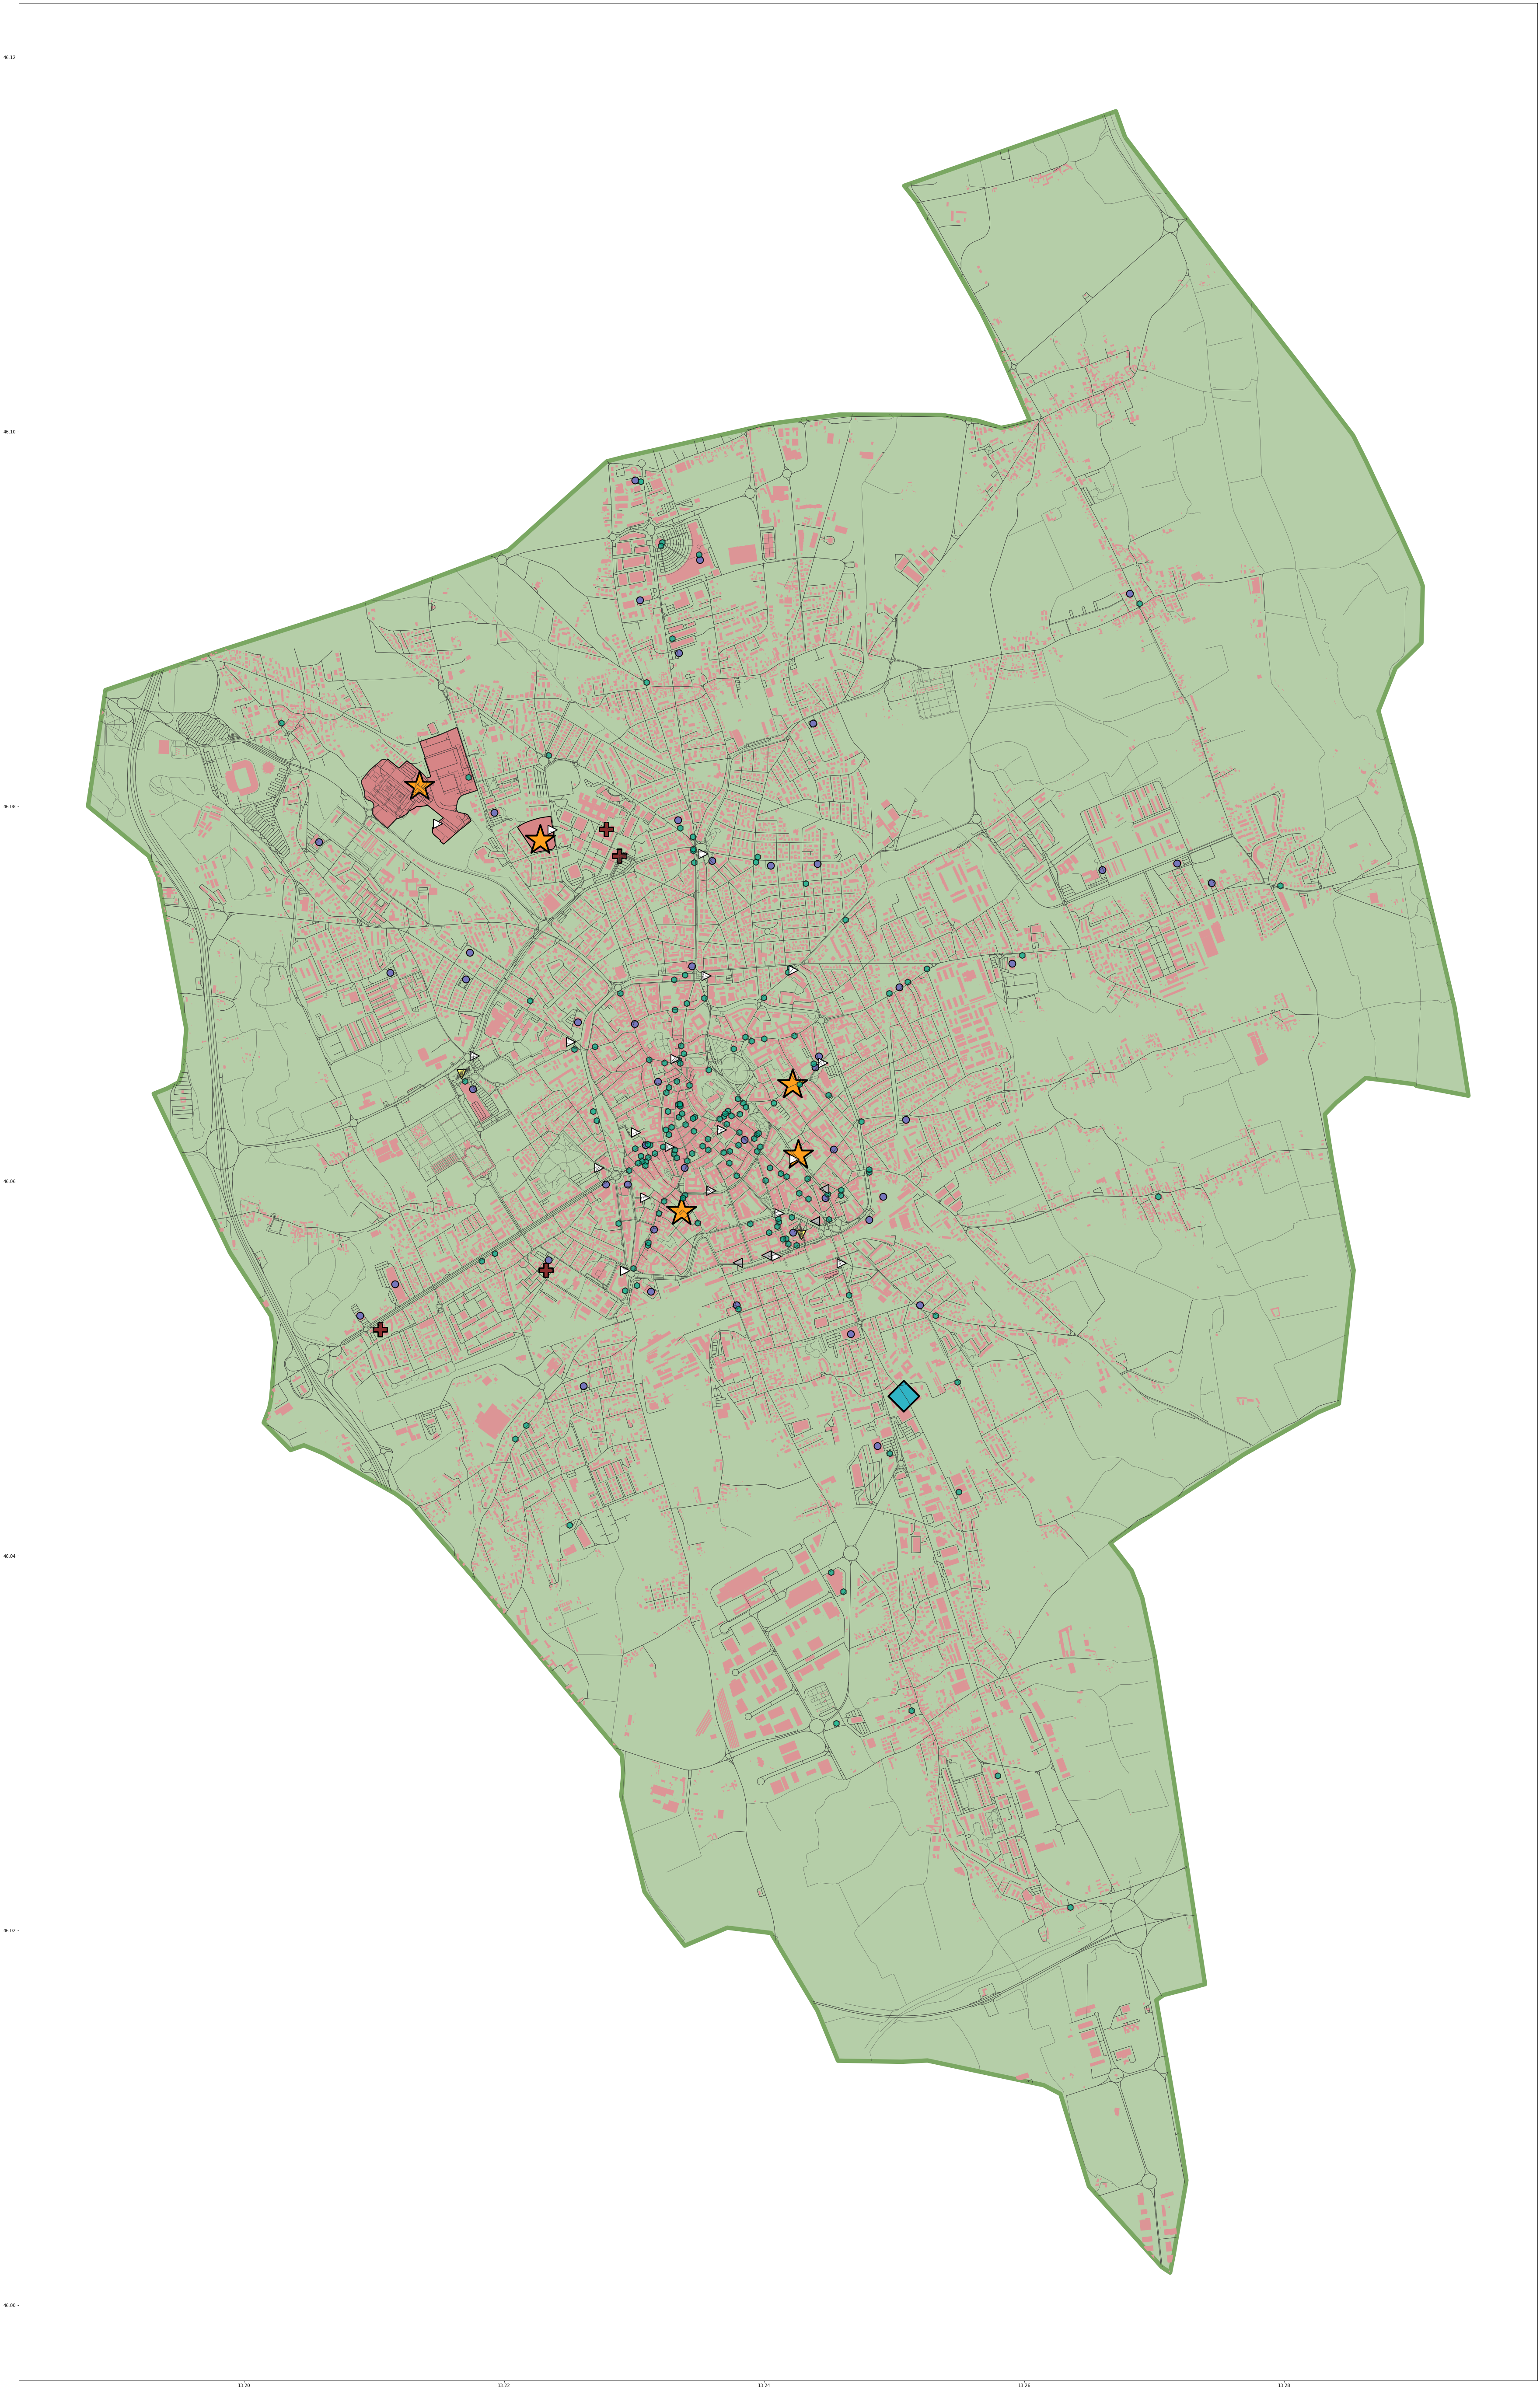

In [12]:
list_of_places_to_plot = [
    "university",
    "supermarket",
    "hospital",
    "eating place",
    "bicycle rental",
    "car rental",
    "bus station"
]

address = "Via Baldasseria Bassa, Udine, Italy"

plot_udine_map(
    udine_geodf = udine_geodf, 
    udine_osm = udine_osm, 
    list_of_places = list_of_places_to_plot,
    custom_address = address,
    save = True,
    save_path="../dataviz/udine_complete_map.jpg"
    )

You can also find the visualization in the `dataviz` folder.

---

# TEST ZONE